<a href="https://colab.research.google.com/github/DhrubaAdhikary/Learn_CV_with_Dhruv/blob/master/CV_8_RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

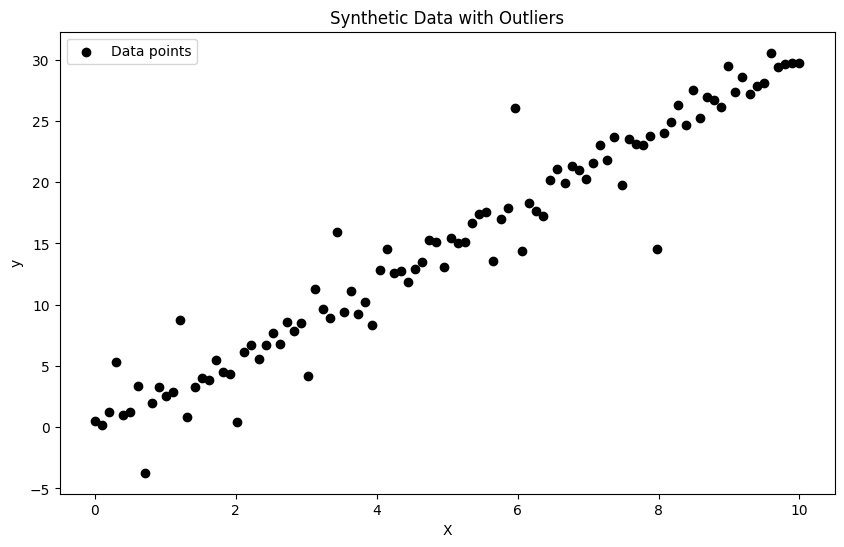

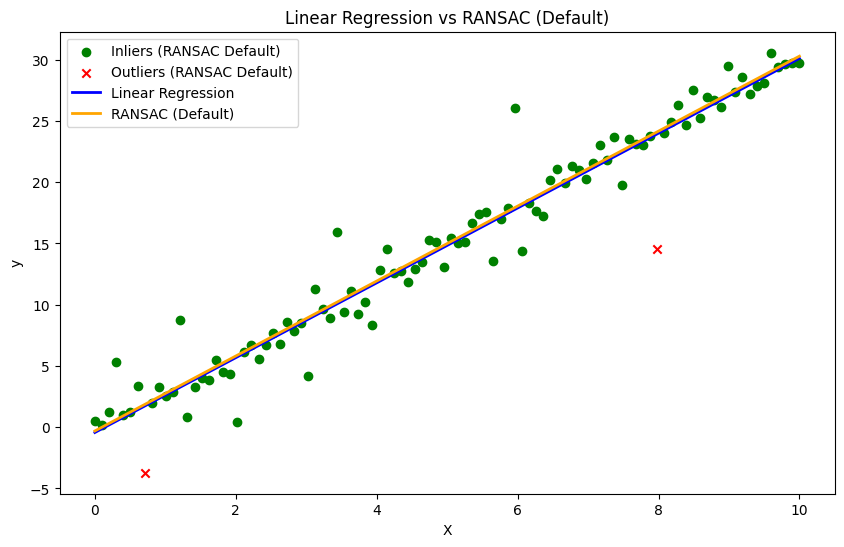

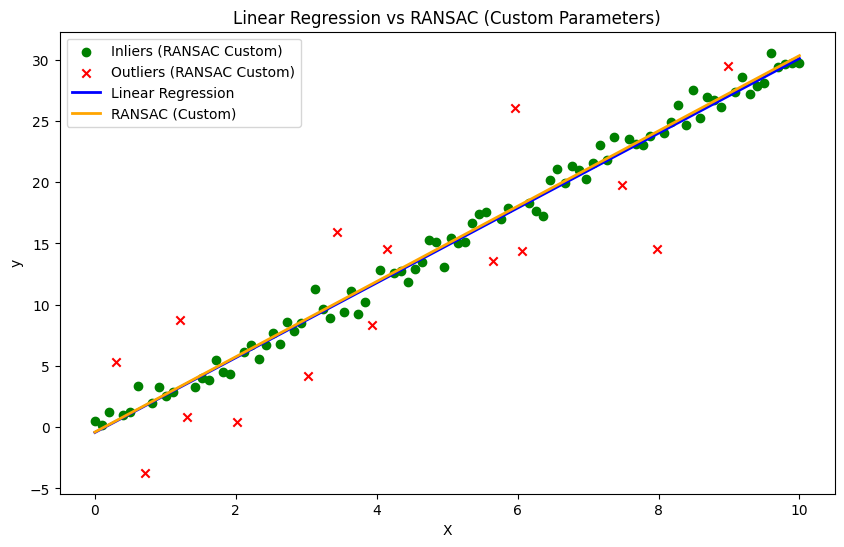

=== RANSAC Default Parameters ===
Estimator: LinearRegression()
Number of inliers: 98
Number of outliers: 2

=== RANSAC Custom Parameters ===
Estimator: LinearRegression()
Residual threshold: 2
Number of inliers: 85
Number of outliers: 15


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Step 1: Generate synthetic data with outliers
np.random.seed(42)
n_samples = 100  # Total number of samples
n_outliers = 20  # Number of outliers

# Generate linear data
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = 3 * X.flatten() + np.random.normal(size=n_samples)

# Add outliers
outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
y[outlier_indices] += 15 * (0.5 - np.random.rand(n_outliers))  # Large deviations for outliers

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="black", label="Data points")
plt.title("Synthetic Data with Outliers")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 2: Fit a Linear Regression model (baseline)
lr = LinearRegression()
lr.fit(X, y)

# Step 3: Fit a RANSAC model with default parameters
ransac_default = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac_default.fit(X, y)

# Step 4: Visualize results for default RANSAC
inlier_mask_default = ransac_default.inlier_mask_
outlier_mask_default = ~inlier_mask_default

plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask_default], y[inlier_mask_default], color="green", marker="o", label="Inliers (RANSAC Default)")
plt.scatter(X[outlier_mask_default], y[outlier_mask_default], color="red", marker="x", label="Outliers (RANSAC Default)")
plt.plot(X, lr.predict(X), color="blue", linewidth=2, label="Linear Regression")
plt.plot(X, ransac_default.predict(X), color="orange", linewidth=2, label="RANSAC (Default)")
plt.title("Linear Regression vs RANSAC (Default)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 5: Experiment with different RANSAC parameters
# Customize parameters
ransac_custom = RANSACRegressor(
    estimator=LinearRegression(),
    min_samples=0.5,  # Use at least 50% of samples for model fitting
    residual_threshold=2,  # Maximum residual to consider a point as an inlier
    max_trials=200,  # Try up to 200 iterations
    stop_probability=0.99,  # Desired probability of finding the best model
    random_state=42
)
ransac_custom.fit(X, y)

# Step 6: Visualize results for custom RANSAC
inlier_mask_custom = ransac_custom.inlier_mask_
outlier_mask_custom = ~inlier_mask_custom

plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask_custom], y[inlier_mask_custom], color="green", marker="o", label="Inliers (RANSAC Custom)")
plt.scatter(X[outlier_mask_custom], y[outlier_mask_custom], color="red", marker="x", label="Outliers (RANSAC Custom)")
plt.plot(X, lr.predict(X), color="blue", linewidth=2, label="Linear Regression")
plt.plot(X, ransac_custom.predict(X), color="orange", linewidth=2, label="RANSAC (Custom)")
plt.title("Linear Regression vs RANSAC (Custom Parameters)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Step 7: Summary of RANSAC Parameters
print("=== RANSAC Default Parameters ===")
print(f"Estimator: {ransac_default.estimator}")
print(f"Number of inliers: {np.sum(inlier_mask_default)}")
print(f"Number of outliers: {np.sum(outlier_mask_default)}")

print("\n=== RANSAC Custom Parameters ===")
print(f"Estimator: {ransac_custom.estimator}")
print(f"Residual threshold: {ransac_custom.residual_threshold}")
print(f"Number of inliers: {np.sum(inlier_mask_custom)}")
print(f"Number of outliers: {np.sum(outlier_mask_custom)}")


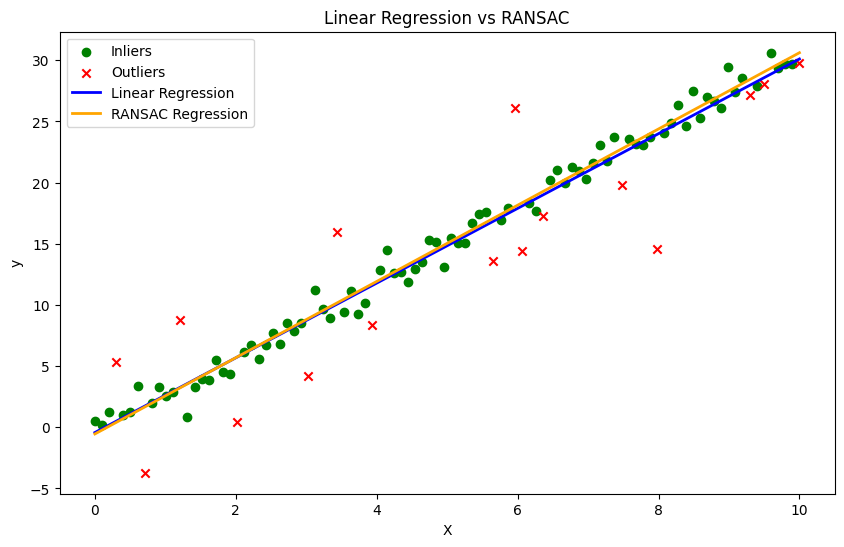

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Generate synthetic data with outliers
np.random.seed(42)
n_samples = 100
n_outliers = 20

# Generate linear data
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = 3 * X.flatten() + np.random.normal(size=n_samples)

# Add outliers
outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
y[outlier_indices] += 15 * (0.5 - np.random.rand(n_outliers))

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Fit a RANSAC model
ransac = RANSACRegressor(estimator=LinearRegression(), max_trials=100, residual_threshold=3)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# Predictions
line_X = np.linspace(0, 10, 100).reshape(-1, 1)
line_y_lr = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='green', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='x', label='Outliers')
plt.plot(line_X, line_y_lr, color='blue', linewidth=2, label='Linear Regression')
plt.plot(line_X, line_y_ransac, color='orange', linewidth=2, label='RANSAC Regression')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression vs RANSAC")
plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the images
img1 = cv2.imread("/content/img4.png", cv2.IMREAD_GRAYSCALE)  # First image (e.g., template)
img2 = cv2.imread("/content/img4.png", cv2.IMREAD_GRAYSCALE)  # Second image (e.g., target)


# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error: Unable to load one or both images. Please check the file paths.")
    exit()

# Step 2: SIFT Feature Detection with Custom Parameters
sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.03, edgeThreshold=5, sigma=1.2)

# Detect SIFT keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Check if descriptors are detected
if descriptors1 is None or descriptors2 is None:
    print("Error: Unable to detect features in one or both images.")
    exit()

# Step 3: Feature Matching using FLANN (Fast Library for Approximate Nearest Neighbors)
# FLANN parameters: algorithm=1 (KDTree), trees=5, checks=50
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=50)  # Number of nearest neighbor checks

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform the matching
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to keep good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:  # Lowe's ratio test threshold
        good_matches.append(m)

# Step 4: Homography Calculation using RANSAC
# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute Homography using RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, ransacReprojThreshold=3.0)

# Step 5: Visualization of Keypoints and Matches
# Create a mask for inliers and outliers
matchesMask = mask.ravel().tolist()

# Draw the matches
draw_params = dict(matchColor=(0, 255, 0),  # Green matches
                   singlePointColor=(255, 0, 0),  # Red keypoints
                   matchesMask=matchesMask,  # Mask for inliers
                   flags=cv2.DrawMatchesFlags_DEFAULT)

# Draw the matches on the images
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, **draw_params)

# Display the matched features
plt.imshow(img_matches)
plt.title("SIFT Keypoint Matches with RANSAC")
plt.show()

# Optionally, warp the image based on the computed homography (to visualize alignment)
if H is not None:
    h, w = img1.shape
    img_warped = cv2.warpPerspective(img2, H, (w, h))
    plt.imshow(img_warped, cmap='gray')
    plt.title("Warped Image Using Homography")
    plt.show()

Error: Unable to load one or both images. Please check the file paths.


error: OpenCV(4.11.0) /io/opencv/modules/features2d/src/sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'
